## 2.3. Содержание ноутбука HW02.ipynb (основная часть)

### 2.3.1. Загрузка данных и первичный осмотр

In [ ]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Загрузка датасета из csv в датафрейм Pandas
path = 'S02-hw-dataset.csv'
data = pd.read_csv(path)

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296
5,6,120.0,FR,-1,785
6,7,46.0,RU,0,0
7,8,28.0,CN,2,456
8,9,39.0,US,4,980
9,10,24.0,RU,7,511


In [ ]:
a = data.head(10) # Вывод первых 10 строк таблицы
b = data.info() # Общая информация щ таблице (размер таблицы, столбцы и их типы)
c = data.describe() # Базовую статистика по числовым столбцам
print(a, b, c)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB
   user_id    age country  purchases  revenue
0        1   25.0      FR          7      749
1        2   24.0      RU          5     1115
2        3   52.0      FR          7      399
3        4   31.0      RU          6      654
4        5    NaN      DE          6     1296
5        6  120.0      FR         -1      785
6        7   46.0      RU          0        0
7        8   28.0      CN          2      456
8        9   39.0      US          4      980
9       10   24.0      RU          7      511 None          user_id         age  purchases      

### 2.3.2. Пропуски, дубликаты и базовый контроль качества

In [ ]:
data.isna().mean() # Доля пропусков в каждом столбце

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [ ]:
dub = data.duplicated() # Проверяем полные дубликаты строк


np.int64(1)

In [ ]:
a = data[(data['age'] < 0) | (data['age'] > 100)] # Находим аномальные значения возраста
if not a.empty:
    print(a)

   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785


In [ ]:
a = data[data['purchases'] < 0] # Строки, где количество покупок отрицательное
if not a.empty:
    print(a)

   user_id    age country  purchases  revenue
5        6  120.0      FR         -1      785


In [ ]:
a = data[data['revenue'] < 0] # Строки, где выручка отрицательная
if not a.empty:
    print(a)

In [ ]:

a = data[((data['revenue'] > 0) & (data['purchases'] == 0)) | ((data['revenue'] == 0) & (data['purchases'] < 0))] # Строки, где есть выручка без покупок или покупки без выручки (логические противоречия)
if not a.empty:
    print(a)

### 2.3.3. Базовый EDA: группировки, агрегаты и частоты

In [ ]:
print(data['country'].value_counts()) # Частоты по странам: сколько пользователей в каждой стране

#print(pd.crosstab(data['country'], data['age']))

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64


In [ ]:
grouped = (data.groupby('country')[['revenue','purchases']].agg(['sum', 'mean', 'count'])) # группировка по странам: сумма, среднее и количество записей для выручки и покупок
grouped

revenue                    purchases                
            sum         mean count       sum      mean count
country                                                     
CN         2108  1054.000000     2         9  4.500000     2
DE         8673  1445.500000     6        39  6.500000     6
FR         8111   675.916667    12        51  4.250000    12
RU        10271   790.076923    13        62  4.769231    13
US         4459   557.375000     8        37  4.625000     8

In [ ]:
data['age_bin'] = pd.cut(
    data['age'],
    bins=[0, 25, 40, 60, 150],
    labels=['0–25', '26–40', '41–60', '60+']
) # добавляем столбец с возрастными группами 

grouped_age = (data.groupby('age_bin')[['purchases', 'revenue']].mean()) # среднее число покупок и средняя выручка по каждой возрастной группе

print(grouped_age)


         purchases      revenue
age_bin                        
0–25      5.166667   700.666667
26–40     5.285714  1065.357143
41–60     4.000000   632.333333
60+      -1.000000   785.000000


C:\Users\slokew\AppData\Local\Temp\ipykernel_21740\997780368.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_age = (data.groupby('age_bin')[['purchases', 'revenue']].mean())


1. В выборке доминируют пользователи из России и Франции, а данные по другим странам играют вспомогательную роль.

2. По возрастным группам больше всего покупают пользователи среднего возраста (примерно от 25 до 45 лет), у них и количество покупок, и суммарная выручка выше, чем у самых молодых и самых возрастных клиентов.

3. В данных есть аномалии: отрицательные покупки, возраст старше 100 лет и несогласованные значения выручки и числа покупок.


## 2.4. Визуализация данных в Matplotlib

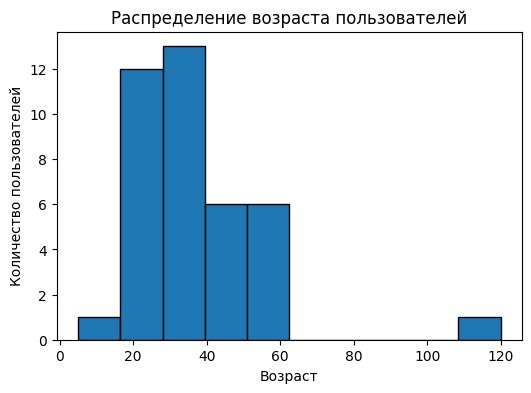

In [ ]:
plt.figure(figsize=(6, 4))
# Гистограмма количества покупок
plt.hist(data['age'].dropna(), bins=10, edgecolor='black')
plt.title('Распределение возраста пользователей')
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей')
# Сохраняем построенный график в папку figures
plt.savefig('figures/plot_1.png')
plt.show()

Показано распределение возраста; видно, что большинство пользователей 20–45 лет.

<Figure size 600x400 with 0 Axes>

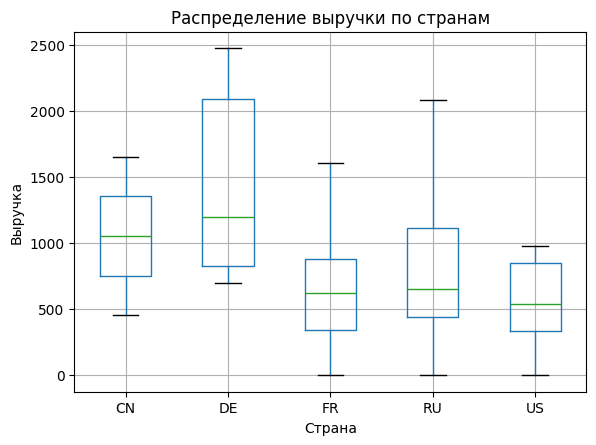

In [ ]:
plt.figure(figsize=(6, 4))
# Boxplot выручки по странам
data.boxplot(column='revenue', by='country')
plt.title('Распределение выручки по странам')
plt.suptitle('')
plt.xlabel('Страна')
plt.ylabel('Выручка')
# Сохраняем построенный график в папку figures
plt.savefig('figures/plot_2.png')
plt.show()

Показано распределение выручки в странах; заметно, что медианы и разброс сильно отличаются, есть выбросы.

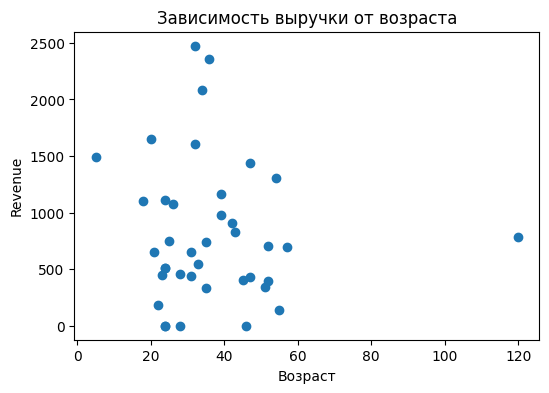

In [ ]:
plt.figure(figsize=(6, 4))
# Диаграмма рассеяния: возраст и выручка
plt.scatter(data['age'], data['revenue'])
plt.title('Зависимость выручки от возраста')
plt.xlabel('Возраст')
plt.ylabel('Revenue')
# Сохраняем построенный график в папку figures
plt.savefig('figures/plot_3.png')
plt.show()


Показана связь возраста и выручки; сильной линейной зависимости не видно, но крупные суммы чаще у среднего возраста.